# Lab03 - Clustering

## Yêu cầu bài tập

**Cách làm bài**


- Bạn sẽ làm trực tiếp trên file notebook này; trong file, từ `TODO` để cho biết những phần mà bạn cần phải làm. **Không được sửa những chỗ không có** `TODO`.

- Bạn có thể thảo luận ý tưởng cũng như tham khảo các tài liệu, nhưng *code và bài làm phải là của bạn*. 

- Nếu vi phạm thì sẽ bị 0 điểm cho bài tập này.

- Trước khi nộp bài, rerun lại notebook (`Kernel` -> `Restart & Run All`) và ấn Ctrl+S để lưu lại.

**Nội dung bài tập**

Trong bài này, bạn sẽ cài đặt 2 thuật toán `k-means` và `k-medois` để gom nhóm dữ liệu. 

## Import thư viện 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Cài đặt thuật toán K-mean

Tính khoảng cách euclid giữa 2 điểm dữ liệu x, y

In [3]:
def euclidianDistance(x, y):
    '''
    Euclidian distance between x, y
    --------
    Return
    d: float
    '''
    #TODO
    d = np.linalg.norm(x - y, axis=0)
    return d
 

In [4]:
class k_means:
    def __init__(self, k=2, thresold = 0.001, max_iter = 300, has_converged=False):
      
        ''' 
        Class constructor
        
        Parameters
        ----------
        - k: number of clusters. 
        - thresold (percentage): stop algorithm when difference between prev cluster 
                                 and new cluster is less than thresold
        - max_iter: number of times centroids will move
        - has_converged: to check if the algorithm stop or not
        '''

 
        self.k = k
        self.thresold = thresold
        self.max_iter = max_iter
        self.has_converged= has_converged
        
    def initCentroids(self, X):
        ''' 
        Parameters
        ----------
        X: input data. 
        '''
        self.centroids=[]
        
        #Starting clusters will be random members from X set
        indexes = np.random.randint(0, len(X)-1,3)
        self.centroids=X[indexes]
            
        
    def updateCentroids(self, cur_centroids):
        '''
        Class constructor
        
        Parameters
        ----------
        cur_centroids: list of new centroids
        
        '''
        self.has_converged=True
        
        for c in range(0,self.k):
            prev_centroid = self.centroids[c] 
            cur_centroid  = cur_centroids[c] 
            #checking if % of difference between old position and new position is more than thresold
            
            #TODO d=?
            d = np.sum((cur_centroid - prev_centroid)/prev_centroid*100.0)
            
            
            if  d > self.thresold:
                self.has_converged = False
                self.centroids = cur_centroids
            
    def fit(self, X):
        '''
        FIT function, used to find clusters
    
        Parameters
        ----------
        X: input data. 
        '''
        #Init list cluster centroids
        self.initCentroids(X)
            
        #Main loop
        for i in range(self.max_iter):  
            #Centroids for this iteration
            cur_centroids = []
            
            for centroid in range(0,self.k):
                #List samples of current cluster
                samples = []
                
                for k in range(len(X)):
                    d_list = []
                    for j in range(self.k):
                        d_list.append(euclidianDistance(self.centroids[j], X[k]))
                    
                    # Cluster has minimal distance between its centroid and data sample
                    # TODO (c=???)
                    c = d_list.index(min(d_list))

                    #Store sample to list
                    if c == centroid:
                        samples.append(X[k])   
                
                #New centroids of each cluster is calculated by mean of all samples closest to it
                #TODO (new_centroid=???)
                new_centroid = np.average(samples, axis=0)
            
                cur_centroids.append(new_centroid)
                
            self.updateCentroids(cur_centroids)
            
            if self.has_converged:
                break
        
        #Each cluster represented by its centroid
        return np.array(self.centroids)

    def predict(self, data):
        ''' 
        Parameters
        ----------
        data: input data.
        
        Returns:
        ----------
        pred: list cluster indexes of input data 
        '''
    
        pred = []
        for i in range(len(data)):
            # Create list distances between centroids and data sample
            d_list = []
            for j in range(len(self.centroids)):
                
                # Calculate distances between current data sample and centroid(using euclidian distance) 
                # Store to d_list
                #TODO 
                d_list.append(euclidianDistance(self.centroids[j], data[i]))
                
            # Store the Cluster has minimal distance between its centroid and current data sample to pred
            #TODO 
            pred.append(d_list.index(min(d_list)))
            
        return np.array(pred)

## Chạy thuật toán 

**Khởi tạo dữ liệu**

Ta tạo dữ liệu bằng cách lấy các điểm theo phân phối chuẩn có kỳ vọng tại các điểm có tọa độ (2, 2), (8, 3) và (3, 6), ma trận hiệp phương sai giống nhau và là ma trận đơn vị. Mỗi cluster có 500 điểm. (Chú ý rằng mỗi điểm dữ liệu là một hàng của ma trận dữ liệu.

In [5]:
np.random.seed(8) # This will fix the randomization; so, you and me will have the same results

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

**Hiển thị dữ liệu trên đồ thị**

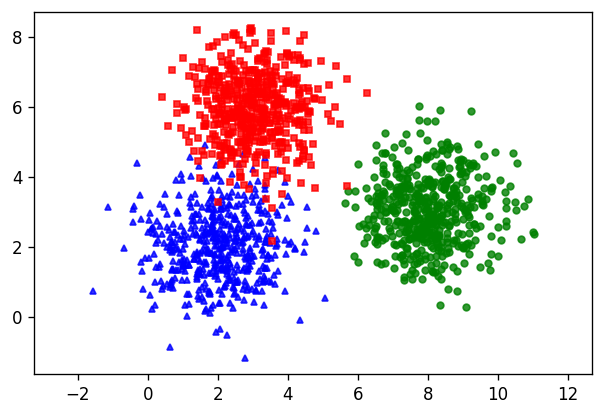

In [6]:
def visualize(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    #you can fix this dpi 
    plt.figure(dpi=120)
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
visualize(X, original_label)

**Gom nhóm dữ liệu bằng thuật toán k-means mà bạn vừa cài đặt**

Centers found by your model:
[[2.04835168 2.23126878]
 [8.02344787 3.061206  ]
 [3.07415337 6.1241854 ]]


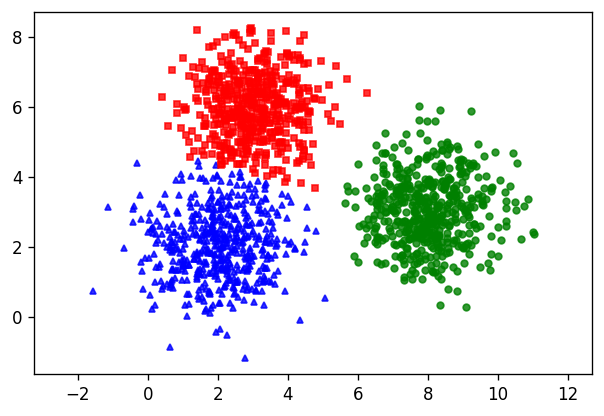

In [24]:
model1=k_means(k=3)
print('Centers found by your model:')
print(model1.fit(X))

pred=model1.predict(X)

visualize(X,pred)


**Thử lại kết quả với scikit learn**

Centers found by scikit-learn:
[[2.01380571 2.02688416]
 [8.02344787 3.061206  ]
 [3.01440769 5.96971345]]


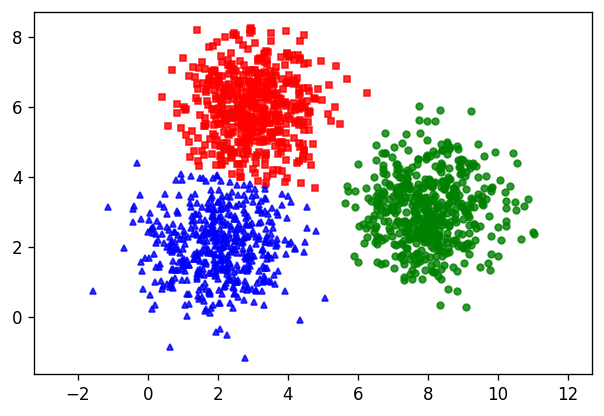

In [12]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model2.cluster_centers_)
pred_label = model2.predict(X)
visualize(X, pred_label)

## 2. Cài đặt thuật toán K-medoids

Các bạn cài đặt và thử nghiệm thuật toán K-medois tương tự như phần 1

In [25]:
#K-medois Implementation
#TODO 
class k_medoids:
    def __init__(self, k = 2, max_iter = 300, has_converged = False, threshold=0.001):
        self.k = k
        self.max_iter = max_iter
        self.has_converged = has_converged
        self.threshold = threshold
        
    def initMedoids(self, X):
        self.medoids = []
        indexes = np.random.randint(0, len(X)-1,3)
        self.medoids = X[indexes]
        
    def isConverged(self, cur_medoids):
        dist = [euclidianDistance(self.medoids[i], cur_medoids[i]) for i in range(self.k)]
        return sum(dist) == 0
        
    def updateMedoids(self, X, clusters, cost):            
        self.has_converged = True
        new_medoids = []
        
        for i in range(self.k):
            new_medoid = self.medoids[i]
            old_cost = cost[i]
            for j in range(len(clusters[i])):         
                # Calculate sum of distance from this new point in cluster to others
                this_cost = np.sum([euclidianDistance(clusters[i][j], clusters[i][idx]) for idx in range(len(clusters[i]))])
                
                if (this_cost - old_cost) < self.threshold:
                    new_medoid = clusters[i][j]
                    old_cost = this_cost
            new_medoids.append(new_medoid)
            
        if not self.isConverged(new_medoids):
            self.medoids = new_medoids
            self.has_converged = False
    
    def label_item_into_current_medoids(self, X):
        clusters = []
        medoids_cost = []
        
        for i in range(self.k):
            i_cost = 0
            labeled = []
            for j in range(len(X)):
                distance_list = [euclidianDistance(self.medoids[k], X[j]) for k in range(self.k)]
                i_cost += min(distance_list)
                if distance_list.index(min(distance_list)) == i:
                    labeled.append(X[j])
                
            clusters.append(labeled)
            medoids_cost.append(i_cost)
            
        return clusters, medoids_cost
            
    def fit(self, X):
        self.initMedoids(X)
        for i in range(self.max_iter):
            labeled_cluster, medoids_cost = self.label_item_into_current_medoids(X)
            if (len(labeled_cluster) != self.k) or (len(medoids_cost) != self.k):
                raise Exception("Something went wrong!!!")
                
            self.updateMedoids(X, labeled_cluster, medoids_cost)
            if self.has_converged: 
                break
                
        return np.array(self.medoids)

        
    def predict(self,data):
        pred = []
        for i in range(len(data)):
            d_list = []
            for j in range(len(self.medoids)):
                d_list.append(euclidianDistance(self.medoids[j],data[i]))
            pred.append(d_list.index(min(d_list)))
        return np.array(pred)

In [26]:
np.random.seed(8) # This will fix the randomization; so, you and me will have the same results

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

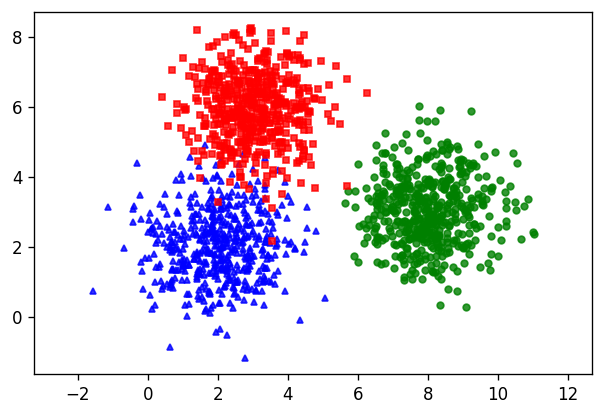

In [27]:
def visualize(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    #you can fix this dpi 
    plt.figure(dpi=120)
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
visualize(X, original_label)

**Gom nhóm dữ liệu bằng thuật toán k-medoids mà bạn vừa cài đặt**

Centers found by your model:
[[1.98413249 2.04159709]
 [7.93224207 3.0213355 ]
 [2.98493437 5.97312308]]


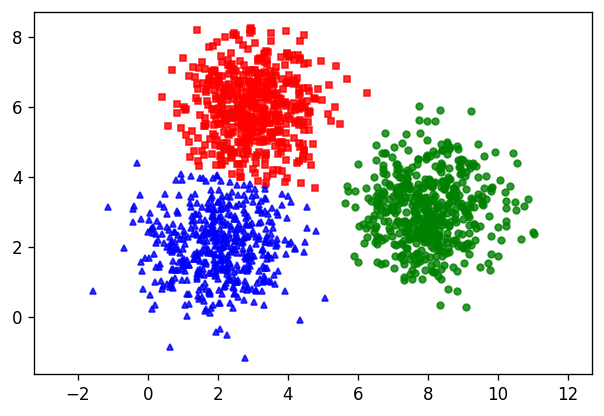

In [28]:
model2=k_medoids(k=3)
print('Centers found by your model:')
print(model2.fit(X))

pred=model2.predict(X)

visualize(X,pred)

**Thử lại kết quả với scikit learn**

Centers found by scikit-learn:
[[1.98413249 2.04159709]
 [7.93224207 3.0213355 ]
 [2.98493437 5.97312308]]


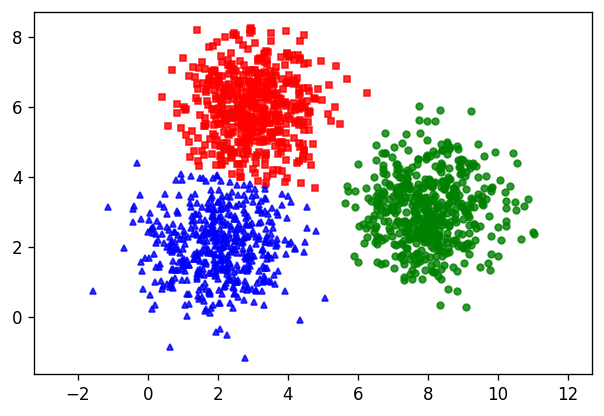

In [29]:
from sklearn_extra.cluster import KMedoids
model1 = KMedoids(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model1.cluster_centers_)
pred_label = model1.predict(X)
visualize(X, pred_label)

**Nêu điểm khác biệt giữa thuật toán K-means và K-medoids:**

TODO: 
- k-medoids can use with any similarity measure but k-means just only use with distances that are suitable with the mean. So, it make k-medoids is more flexible than k-means
- time complexity of k-medoids is O(n^2 * k * i) and k-means is O(n * k * i) where n is the number of d-dimensional vectors (to be clustered), k is the number of clusters and i is the number of iterations needed until convergence. Thus, we can run again two algorithm above and we can realize that the cost for k-medoids is much more expensive that make it run longer than k-means 
- k-medoids is more robust to noise and outliers as compared to k-means because it minimizes a sum of pairwise dissimilarities instead of a sum of squared euclidean distances

# 3. Sử dụng thuật toán gom cụm trên tập dữ liệu Iris 

In [30]:
from sklearn import datasets
iris = datasets.load_iris()

In [31]:
X = iris.data
y = iris.target

Text(0, 0.5, 'Pepal Width')

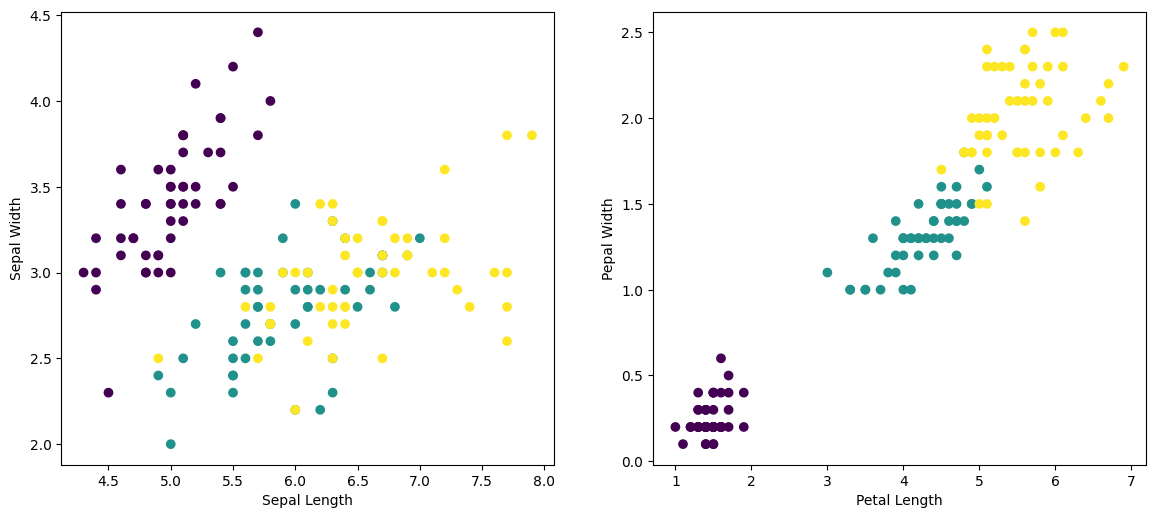

In [32]:
#Visualizing data
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[1].scatter(X[:,2], X[:,3], c=y)
axes[1].set_xlabel('Petal Length')
axes[1].set_ylabel('Pepal Width')

**Nhận xét:**

TODO: In first graph, it shows the relationship between sepai length and sepai width and the scatter is fairly random but in second graph, it shows the relationship between petal length and petal width are more closely 

In [34]:
D=X[:,2:]
model=k_means(k=3)
centers = model.fit(D)
print(centers)

[[4.42807018 1.41754386]
 [1.56037736 0.29056604]
 [5.715      2.0925    ]]


Text(0.5, 1.0, 'Predicted')

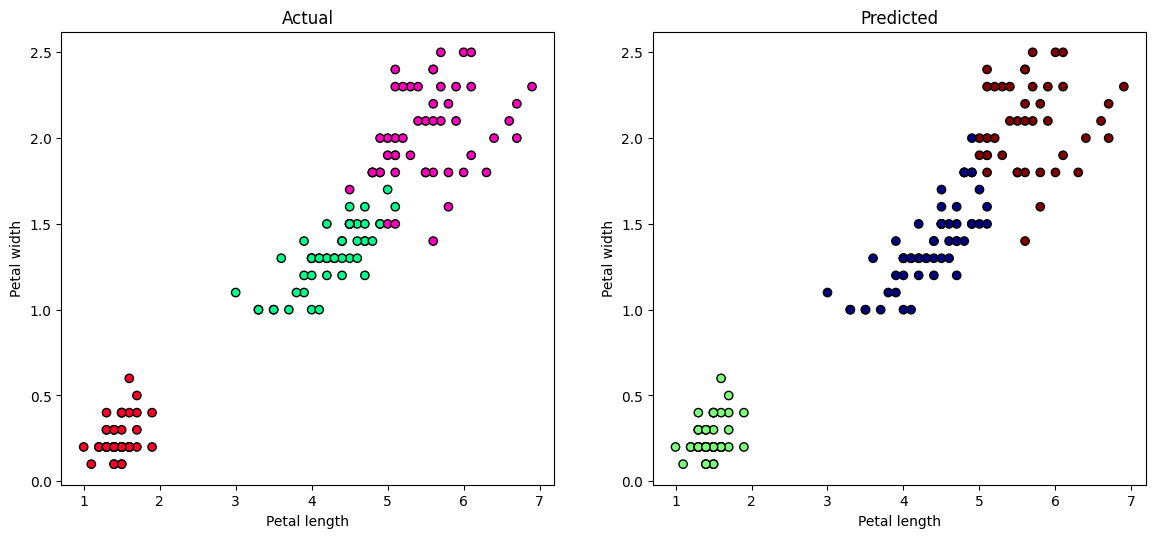

In [35]:
new_labels = model.predict(D)
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(D[:, 0], D[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k')
axes[1].scatter(D[:, 0], D[:, 1], c=new_labels, cmap='jet',
edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')

**Nhận xét kết quả:**

TODO: From two graph above, we can see that result from predicted graph is quite similarly when comparing to actual graph



### Thực hiện tương tự với thuật toán K-medois

In [36]:
#TODO
D1=X[:,2:]
model1=k_medoids(k=3)
centers1 = model1.fit(D1)
print(centers1)

[[4.4 1.4]
 [5.6 2.1]
 [1.4 0.2]]


Text(0.5, 1.0, 'Predicted')

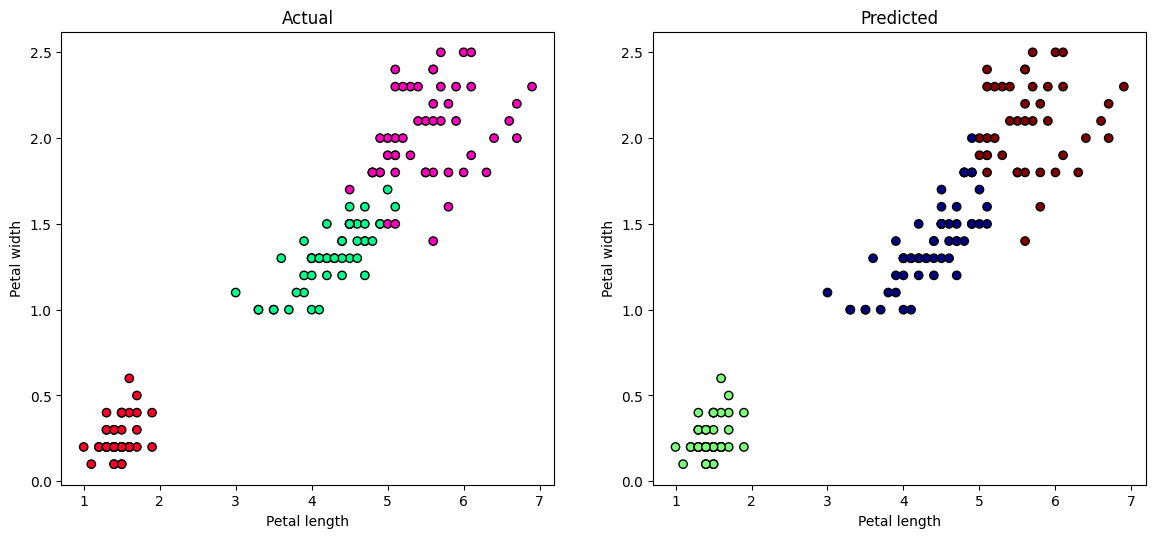

In [37]:
new_labels1 = model1.predict(D1)
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(D1[:, 0], D1[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k')
axes[1].scatter(D1[:, 0], D1[:, 1], c=new_labels, cmap='jet',
edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')

When using k-medoids, we also achieve the same result while comparing to k-means